In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import folium
import numpy as np

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
property_mean_price = pd.DataFrame(df[['log_price', 'property_type']].groupby(['property_type'], as_index = False).mean().sort_values('log_price', ascending=False))

In [5]:
data = df.copy()
data = pd.merge(data, property_mean_price, on = 'property_type', how = 'left')

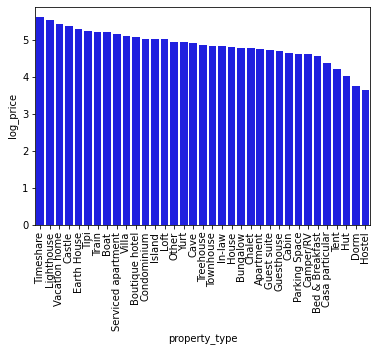

In [33]:
mean_plot =sns.barplot(x = property_mean_price['property_type'], y = property_mean_price['log_price'], color = 'blue')
mean_plot.set_xticklabels(mean_plot.get_xticklabels(), rotation = 90)
plt.show()

In [7]:
for i in range(len(data['property_type'])):
    if(data['log_price_y'][i] < 4.665842):
        data['property_type'][i] = 1
    elif(data['log_price_y'][i] < 4.845520):
        data['property_type'][i] = 2
    elif(data['log_price_y'][i] < 5.129947):
        data['property_type'][i] = 3
    else: data['property_type'][i] = 4

        
df['property_type'] = data['property_type']

<ipython-input-7-f7f34a9fa4ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['property_type'][i] = 2
<ipython-input-7-f7f34a9fa4ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['property_type'][i] = 3
<ipython-input-7-f7f34a9fa4ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['property_type'][i] = 1
<ipython-input-7-f7f34a9fa4ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [18]:
mapa = folium.Map(zoom_start = 10, control_scale=True)
domki = list(zip(df["latitude"], df["longitude"]))
HeatMap(domki).add_to(mapa)
mapa

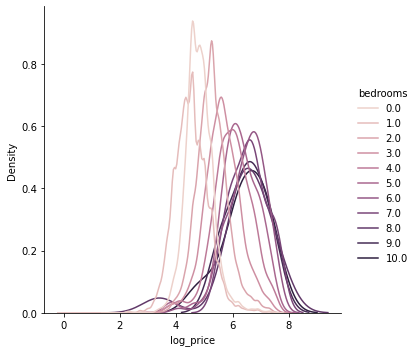

In [19]:
sns.displot(df, x = "log_price", hue = "bedrooms", kind = "kde", common_norm = False)
plt.show()

C:\Users\lukgr\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


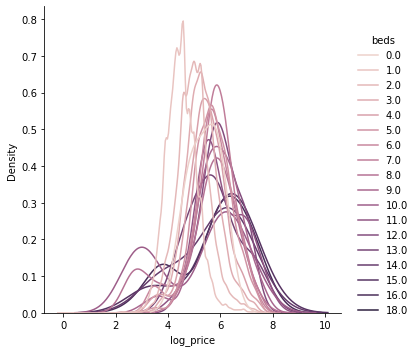

In [20]:
sns.displot(df, x = "log_price", hue = "beds", kind = "kde", common_norm = False)
plt.show()

In [21]:
def violin(data, x, y):
    plt.figure(figsize=(15,8))
    sns.violinplot(data = data, x = x, y = y)
    plt.title("Wykres skrzypcowy ceny w zależności od zmiennej" + y)
    plt.show()

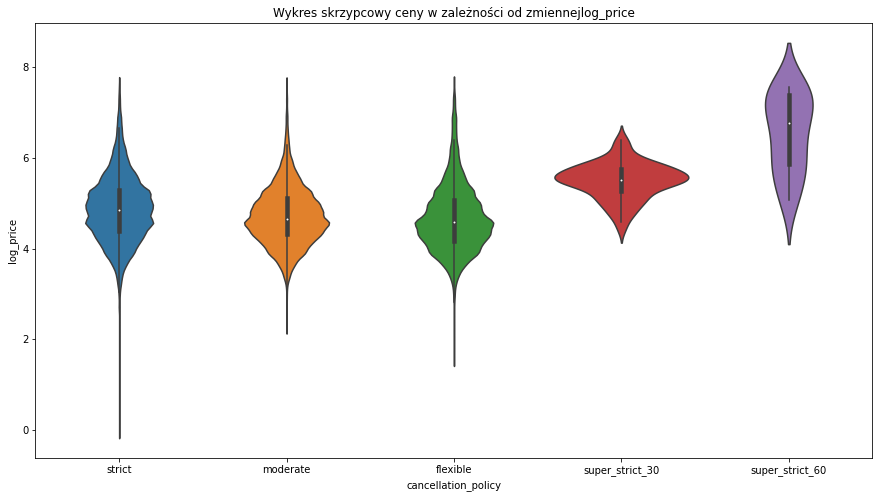

In [46]:
violin(data = df, x = 'cancellation_policy', y = 'log_price')

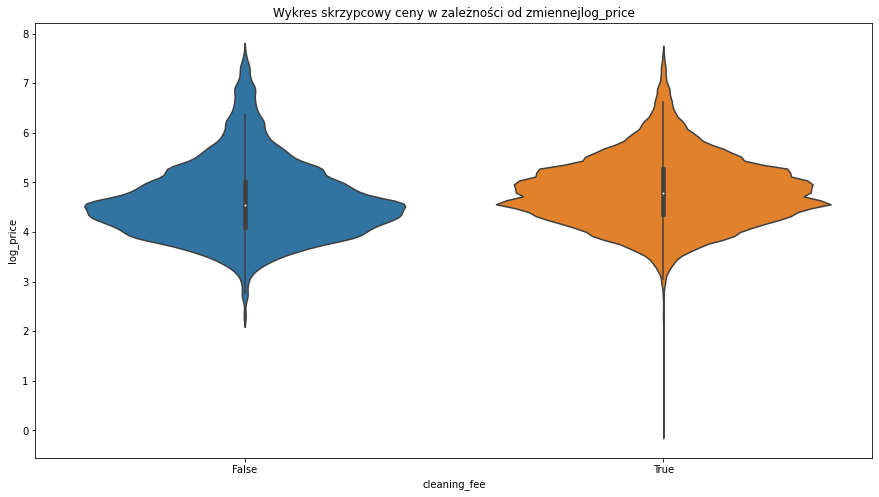

In [47]:
violin(data = df, x = 'cleaning_fee', y = 'log_price')

In [50]:
def count_plot(col):
    plt.figure(figsize=(15,8))
    data = df[col].value_counts()[:min(10, len(df[col].value_counts()))]
    x = data.index
    y = data.values
    sns.barplot(x = x,y = y, color = "blue")
    plt.show()

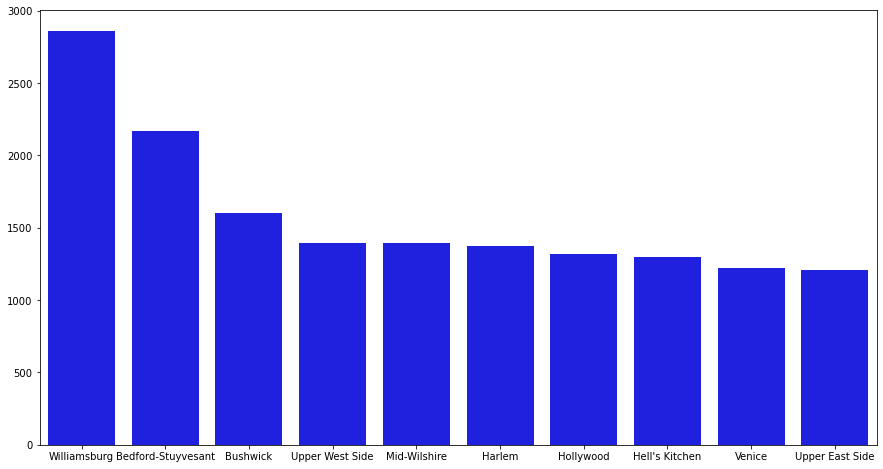

In [51]:
count_plot("neighbourhood")

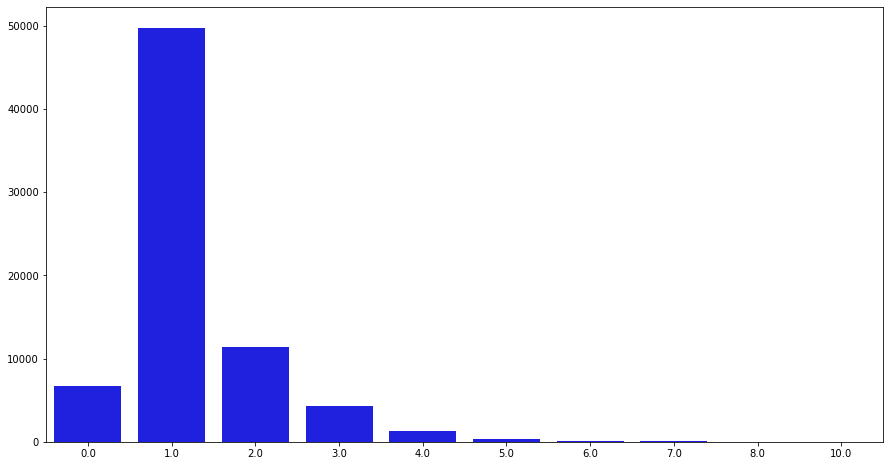

In [53]:
count_plot("bedrooms")